# 8 regressors to be applied for the same datasets and need to calculate the evaluation metrics


Linear Regression:
  - MSE = 0.5559
  - MAE = 0.5332
  - RMSE = 0.7456
  - R² Score = 0.5758

Decision Tree:
  - MSE = 0.4993
  - MAE = 0.4561
  - RMSE = 0.7066
  - R² Score = 0.6189

Random Forest:
  - MSE = 0.2512
  - MAE = 0.3256
  - RMSE = 0.5012
  - R² Score = 0.8083

Gradient Boosting:
  - MSE = 0.2940
  - MAE = 0.3716
  - RMSE = 0.5422
  - R² Score = 0.7756

Support Vector Regressor:
  - MSE = 0.3570
  - MAE = 0.3986
  - RMSE = 0.5975
  - R² Score = 0.7276

KNN Regressor:
  - MSE = 0.4324
  - MAE = 0.4462
  - RMSE = 0.6576
  - R² Score = 0.6700


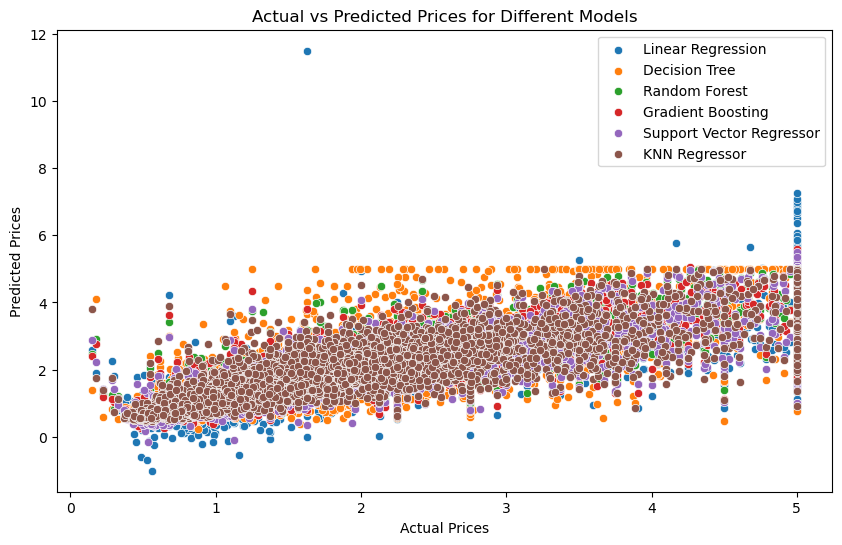

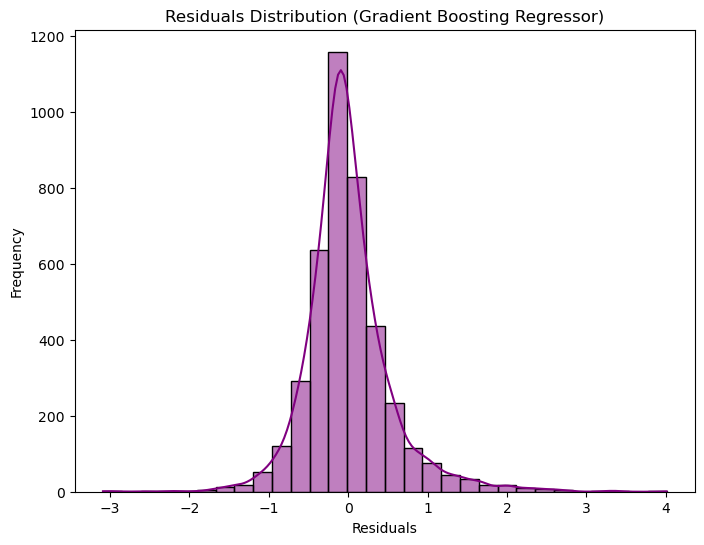

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.datasets import fetch_california_housing  

data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['PRICE'] = data.target  

X, y = df.drop(columns=['PRICE']), df['PRICE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Support Vector Regressor": SVR(),
    "KNN Regressor": KNeighborsRegressor(n_neighbors=5)
}

def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"\n{model_name}:")
    print(f"  - MSE = {mse:.4f}")
    print(f"  - MAE = {mae:.4f}")
    print(f"  - RMSE = {rmse:.4f}")
    print(f"  - R² Score = {r2:.4f}")
    return y_pred

predictions = {}
for name, model in models.items():
    if name in ["Support Vector Regressor", "KNN Regressor"]:
        model.fit(X_train_scaled, y_train)
        predictions[name] = evaluate_model(y_test, model.predict(X_test_scaled), name)
    else:
        model.fit(X_train, y_train)
        predictions[name] = evaluate_model(y_test, model.predict(X_test), name)

plt.figure(figsize=(10, 6))
for name, y_pred in predictions.items():
    sns.scatterplot(x=y_test, y=y_pred, label=name)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices for Different Models")
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(y_test - predictions["Gradient Boosting"], bins=30, kde=True, color='purple')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residuals Distribution (Gradient Boosting Regressor)")
plt.show()



Linear Regression:
  - MSE = 2.9078
  - MAE = 1.2748
  - RMSE = 1.7052
  - R² Score = 0.9059

Decision Tree:
  - MSE = 2.6820
  - MAE = 1.1500
  - RMSE = 1.6377
  - R² Score = 0.9132

Random Forest:
  - MSE = 1.4374
  - MAE = 0.9180
  - RMSE = 1.1989
  - R² Score = 0.9535

Gradient Boosting:
  - MSE = 1.2553
  - MAE = 0.8301
  - RMSE = 1.1204
  - R² Score = 0.9594

Support Vector Regressor:
  - MSE = 4.4210
  - MAE = 1.5554
  - RMSE = 2.1026
  - R² Score = 0.8569

KNN Regressor:
  - MSE = 2.9800
  - MAE = 1.4075
  - RMSE = 1.7263
  - R² Score = 0.9036


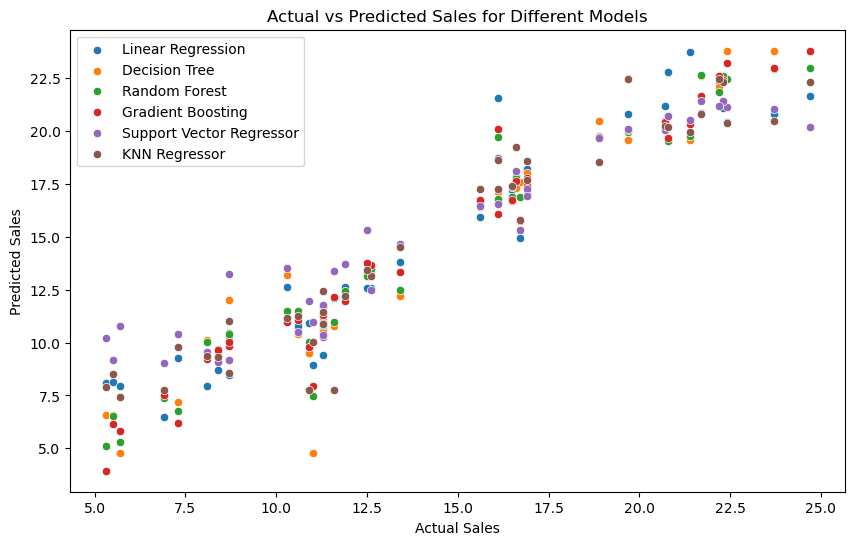

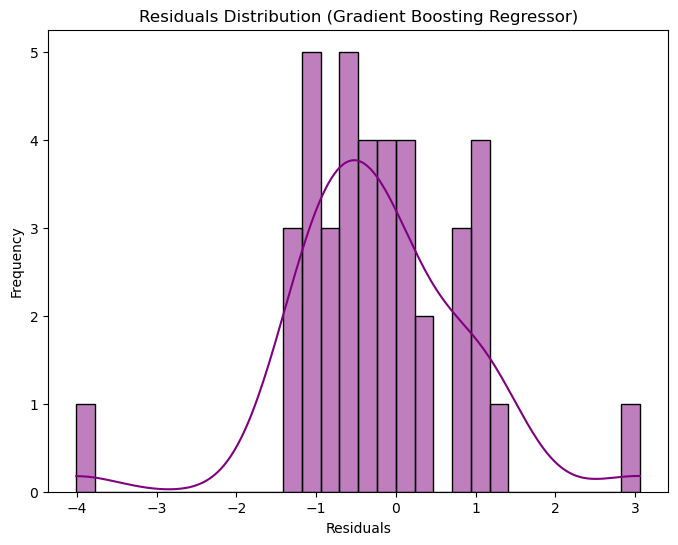

In [2]:
#for advertising dataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

file_path = "advertising.csv"
df = pd.read_csv(file_path)

X, y = df.drop(columns=['Sales']), df['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Support Vector Regressor": SVR(),
    "KNN Regressor": KNeighborsRegressor(n_neighbors=5)
}

def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"\n{model_name}:")
    print(f"  - MSE = {mse:.4f}")
    print(f"  - MAE = {mae:.4f}")
    print(f"  - RMSE = {rmse:.4f}")
    print(f"  - R² Score = {r2:.4f}")
    return y_pred

predictions = {}
for name, model in models.items():
    if name in ["Support Vector Regressor", "KNN Regressor"]:
        model.fit(X_train_scaled, y_train)
        predictions[name] = evaluate_model(y_test, model.predict(X_test_scaled), name)
    else:
        model.fit(X_train, y_train)
        predictions[name] = evaluate_model(y_test, model.predict(X_test), name)

plt.figure(figsize=(10, 6))
for name, y_pred in predictions.items():
    sns.scatterplot(x=y_test, y=y_pred, label=name)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales for Different Models")
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(y_test - predictions["Gradient Boosting"], bins=30, kde=True, color='purple')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residuals Distribution (Gradient Boosting Regressor)")
plt.show()



Linear Regression:
  - MSE = 0.5690
  - MAE = 0.5863
  - RMSE = 0.7543
  - R² Score = 0.2653

Decision Tree:
  - MSE = 0.6939
  - MAE = 0.4816
  - RMSE = 0.8330
  - R² Score = 0.1041

Random Forest:
  - MSE = 0.3478
  - MAE = 0.4185
  - RMSE = 0.5897
  - R² Score = 0.5510

Gradient Boosting:
  - MSE = 0.4618
  - MAE = 0.5359
  - RMSE = 0.6796
  - R² Score = 0.4037

Support Vector Regressor:
  - MSE = 0.4709
  - MAE = 0.5165
  - RMSE = 0.6862
  - R² Score = 0.3920

KNN Regressor:
  - MSE = 0.4769
  - MAE = 0.5237
  - RMSE = 0.6906
  - R² Score = 0.3842


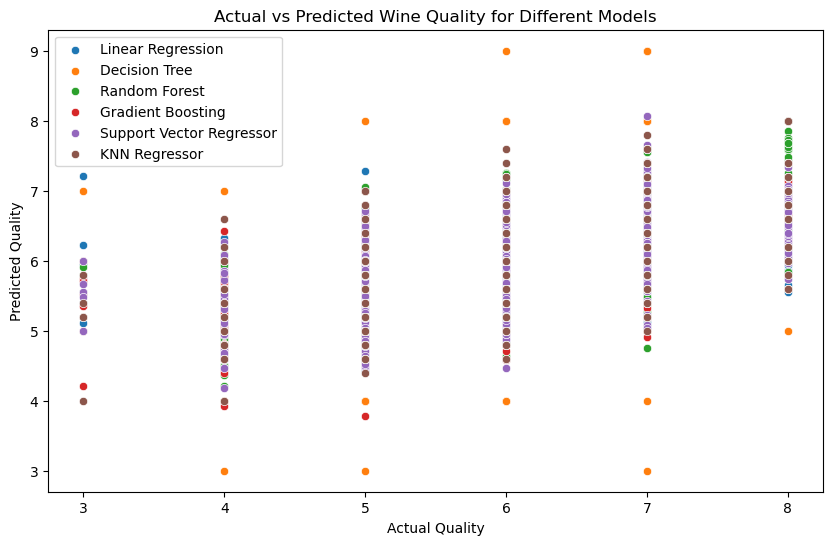

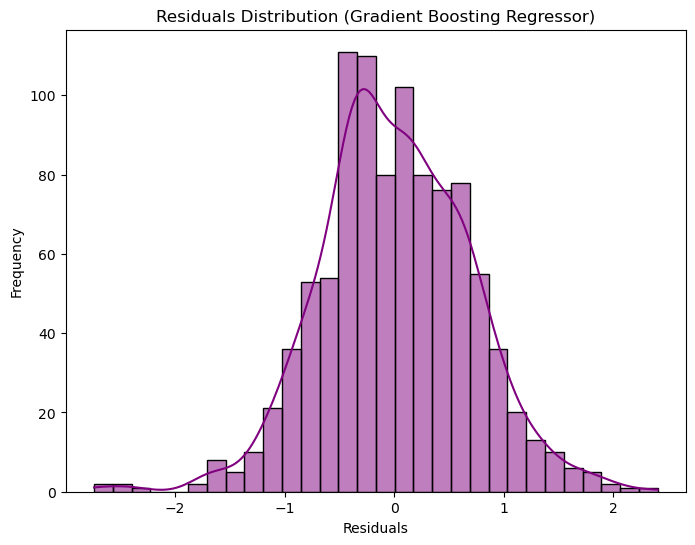

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

file_path = "winequality-white.csv"
df = pd.read_csv(file_path, delimiter=';')  

X, y = df.drop(columns=['quality']), df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Support Vector Regressor": SVR(),
    "KNN Regressor": KNeighborsRegressor(n_neighbors=5)
}

def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"\n{model_name}:")
    print(f"  - MSE = {mse:.4f}")
    print(f"  - MAE = {mae:.4f}")
    print(f"  - RMSE = {rmse:.4f}")
    print(f"  - R² Score = {r2:.4f}")
    return y_pred

predictions = {}
for name, model in models.items():
    if name in ["Support Vector Regressor", "KNN Regressor"]:
        model.fit(X_train_scaled, y_train)
        predictions[name] = evaluate_model(y_test, model.predict(X_test_scaled), name)
    else:
        model.fit(X_train, y_train)
        predictions[name] = evaluate_model(y_test, model.predict(X_test), name)

plt.figure(figsize=(10, 6))
for name, y_pred in predictions.items():
    sns.scatterplot(x=y_test, y=y_pred, label=name)
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title("Actual vs Predicted Wine Quality for Different Models")
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(y_test - predictions["Gradient Boosting"], bins=30, kde=True, color='purple')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residuals Distribution (Gradient Boosting Regressor)")
plt.show()



------ Linear Regression ------
MAE: 0.50 | MSE: 0.39 | RMSE: 0.62 | R²: 0.40

------ Decision Tree Regression ------
MAE: 0.47 | MSE: 0.61 | RMSE: 0.78 | R²: 0.07

------ Random Forest Regression ------
MAE: 0.43 | MSE: 0.31 | RMSE: 0.55 | R²: 0.53

------ Support Vector Regression (SVR) ------
MAE: 0.57 | MSE: 0.53 | RMSE: 0.73 | R²: 0.19

------ KNN Regression ------
MAE: 0.58 | MSE: 0.53 | RMSE: 0.73 | R²: 0.19

------ Naive Bayes Regression (Bayesian Ridge) ------
MAE: 0.51 | MSE: 0.39 | RMSE: 0.63 | R²: 0.40

------ Gradient Boosting Regression ------
MAE: 0.48 | MSE: 0.36 | RMSE: 0.60 | R²: 0.45


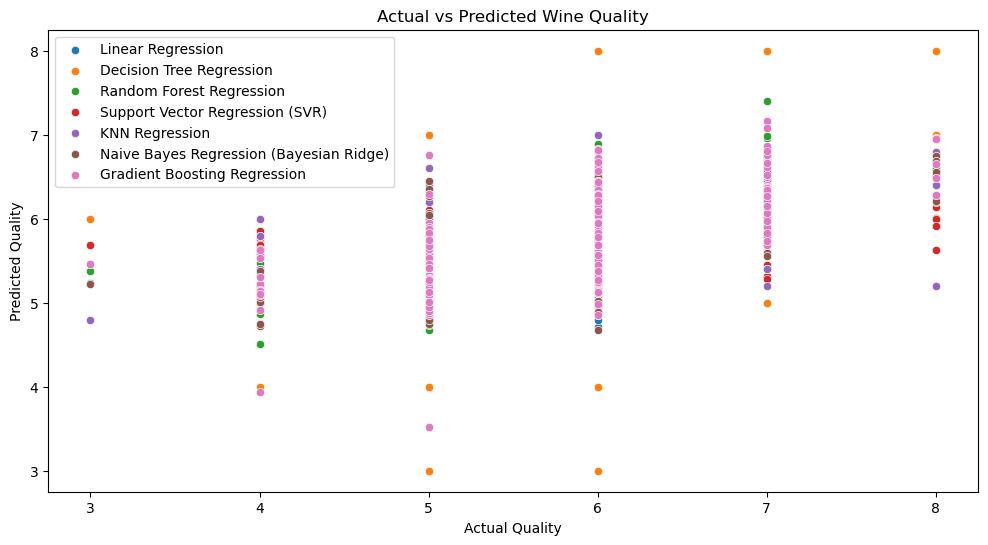

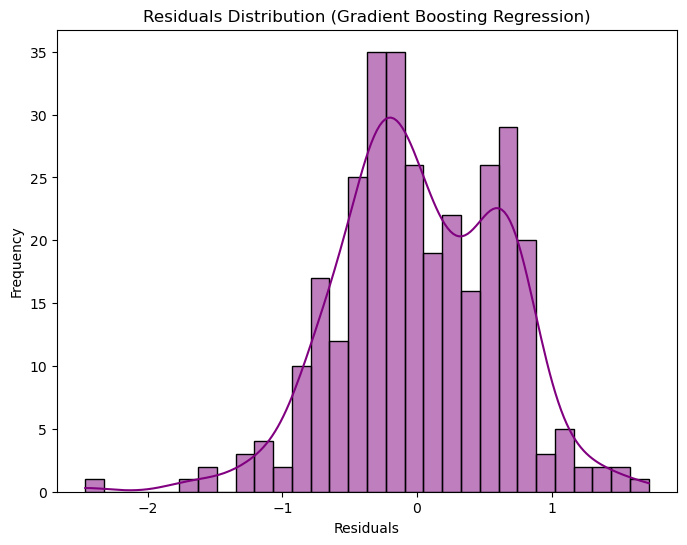

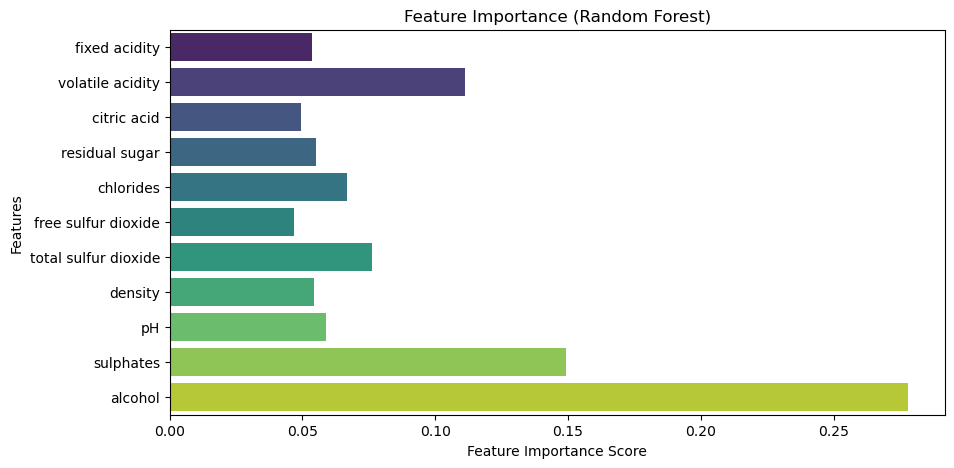

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

df = pd.read_csv("winequality-red.csv", delimiter=',')

X = df.drop(columns=['quality'])  
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regressors = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regression": DecisionTreeRegressor(),
    "Random Forest Regression": RandomForestRegressor(),
    "Support Vector Regression (SVR)": SVR(),
    "KNN Regression": KNeighborsRegressor(),
    "Naive Bayes Regression (Bayesian Ridge)": BayesianRidge(),
    "Gradient Boosting Regression": GradientBoostingRegressor()
}

def evaluate(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"\n------ {model_name} ------")
    print(f"MAE: {mae:.2f} | MSE: {mse:.2f} | RMSE: {rmse:.2f} | R²: {r2:.2f}")
    return y_pred

predictions = {}

for name, model in regressors.items():
    model.fit(X_train, y_train)
    predictions[name] = evaluate(y_test, model.predict(X_test), name)

plt.figure(figsize=(12, 6))
for name, y_pred in predictions.items():
    sns.scatterplot(x=y_test, y=y_pred, label=name)
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title("Actual vs Predicted Wine Quality")
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(y_test - predictions["Gradient Boosting Regression"], bins=30, kde=True, color='purple')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residuals Distribution (Gradient Boosting Regression)")
plt.show()

tree_model = regressors["Random Forest Regression"]
feature_importances = tree_model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importances, y=feature_names, palette="viridis")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance (Random Forest)")
plt.show()
